In [1]:
# Import pandas
import pandas as pd

In [2]:
# Load in the listings data
df=pd.read_csv('data/listings.csv')

In [3]:
#peek at the first few rows
print(df.head())

     id                                               name  host_id  \
0  2595                              Skylit Midtown Castle     2845   
1  3831  Whole flr w/private bdrm, bath & kitchen(pls r...     4869   
2  5121                                    BlissArtsSpace!     7356   
3  5136           Spacious Brooklyn Duplex, Patio + Garden     7378   
4  5178                   Large Furnished Room Near B'way　     8967   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0     Jennifer           Manhattan             Midtown  40.75362  -73.98377   
1  LisaRoxanne            Brooklyn        Clinton Hill  40.68514  -73.95976   
2        Garon            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
3      Rebecca            Brooklyn         Sunset Park  40.66120  -73.99423   
4     Shunichi           Manhattan      Hell's Kitchen  40.76489  -73.98493   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    

####  Exercise 1: Create a bar chart and a corresponding pivot table of the top 10 most expensive Neigborhoods
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood, then we take the top ten and weight each slice 
by the average value.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

<Axes: ylabel='neighbourhood'>

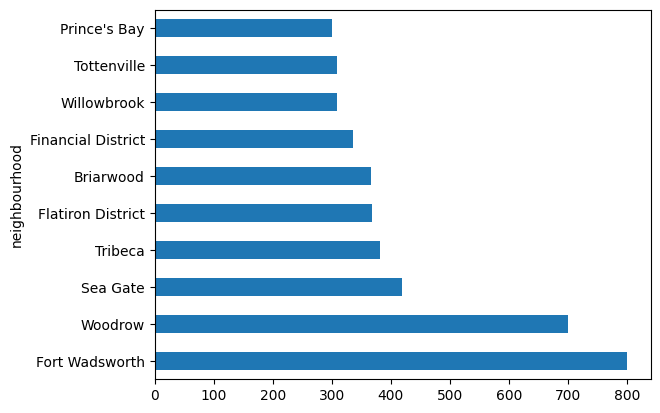

In [4]:
# our goal is to make a chart reflecting the top 10 most expensive Neighborhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighborhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a dataframe that sorts the neighborhood field by decending price.  
df_sorted = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.
df_sorted.head(10).plot.barh()


In [5]:
# Now, display the top 10 dataframe you created as a table with columns
# neighbourhood and price
print(df_sorted.head(10))
#make two columns, one for the neighborhood and one for the price
df_sorted = df_sorted.reset_index()
print(df_sorted.head(10))

neighbourhood
Fort Wadsworth        800.000000
Woodrow               700.000000
Sea Gate              418.230769
Tribeca               381.107143
Flatiron District     367.415584
Briarwood             366.162162
Financial District    335.385057
Willowbrook           309.000000
Tottenville           309.000000
Prince's Bay          300.000000
Name: price, dtype: float64
        neighbourhood       price
0      Fort Wadsworth  800.000000
1             Woodrow  700.000000
2            Sea Gate  418.230769
3             Tribeca  381.107143
4   Flatiron District  367.415584
5           Briarwood  366.162162
6  Financial District  335.385057
7         Willowbrook  309.000000
8         Tottenville  309.000000
9        Prince's Bay  300.000000


####  Exercise 1: Now, create a bar chart and a corresponding pivot table of the top 10 LEAST expensive Neigborhoods
Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Be sure to provide a pivot table.

                neighbourhood      price
0                 South Beach  45.000000
1                 Bull's Head  49.666667
2               Port Richmond  51.222222
3                   Soundview  52.055556
4                New Brighton  52.250000
5  Bay Terrace, Staten Island  55.000000
6                 Hunts Point  56.583333
7          University Heights  57.826087
8                  Grant City  58.400000
9                   Olinville  59.428571


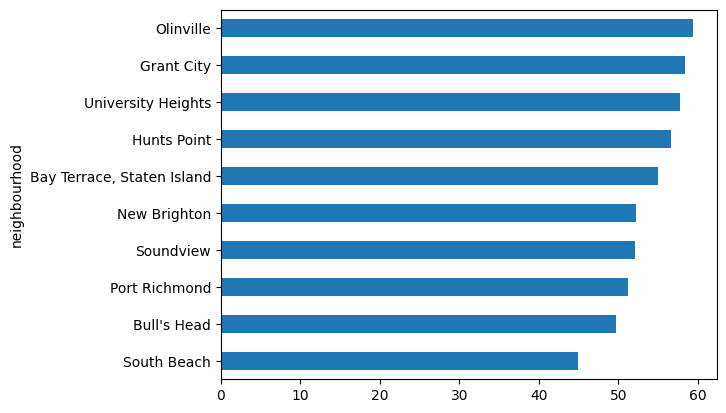

In [6]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.
df_cheapest = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
df_cheapest.head(10).plot.barh()
pivot_cheapest = df_cheapest.head(10).reset_index()
print(pivot_cheapest.head(10))


In [7]:
# we also would like to have the corresponding pivot table of the top 10
pivot_expensive = df_sorted.head(10)
print(pivot_expensive)


        neighbourhood       price
0      Fort Wadsworth  800.000000
1             Woodrow  700.000000
2            Sea Gate  418.230769
3             Tribeca  381.107143
4   Flatiron District  367.415584
5           Briarwood  366.162162
6  Financial District  335.385057
7         Willowbrook  309.000000
8         Tottenville  309.000000
9        Prince's Bay  300.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

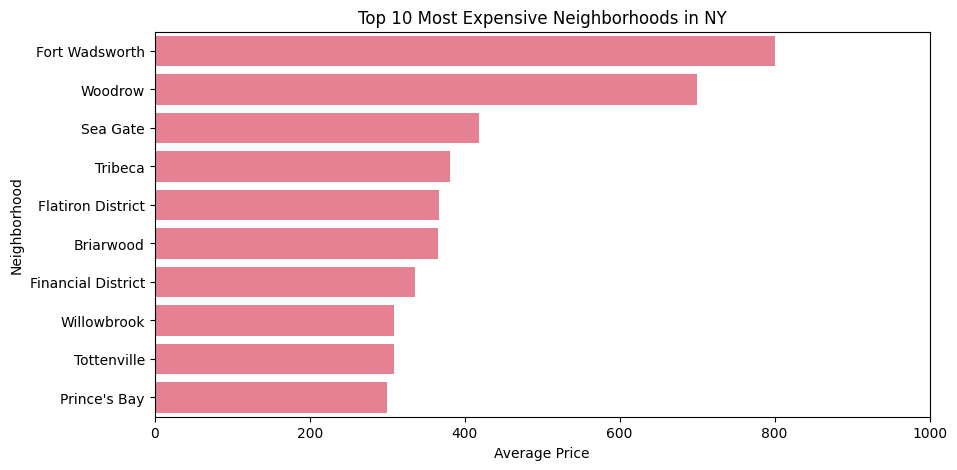

In [9]:
#make the bar plots again but not ugly this time – use seaborn
plt.figure(figsize=(10, 5))
sns.set_palette("husl")
sns.barplot(x='price', y='neighbourhood', data=pivot_expensive)
plt.title('Top 10 Most Expensive Neighborhoods in NY')
plt.xlim(0, 1000)
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()


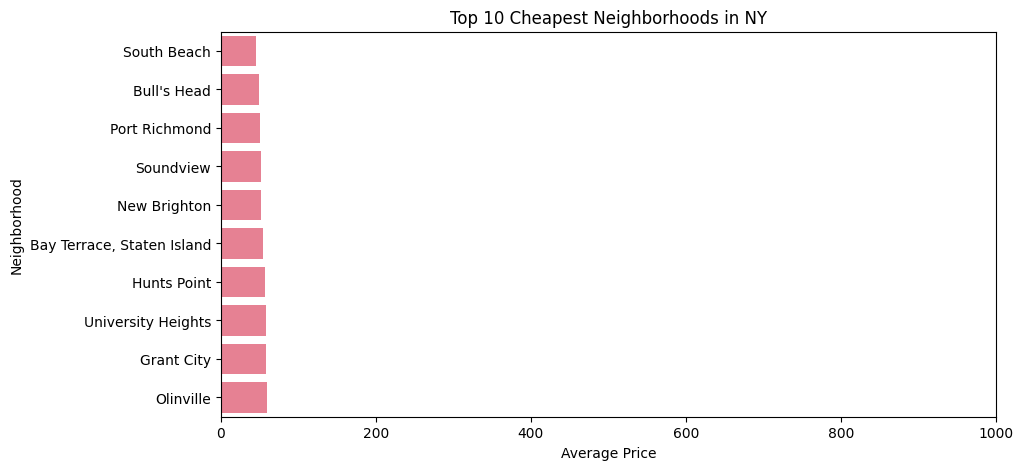

In [10]:
#do the same for the cheapest neighborhoods
plt.figure(figsize=(10, 5))
sns.set_palette("husl")
sns.barplot(x='price', y='neighbourhood', data=pivot_cheapest)
plt.title('Top 10 Cheapest Neighborhoods in NY')
plt.xlim(0, 1000)
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()

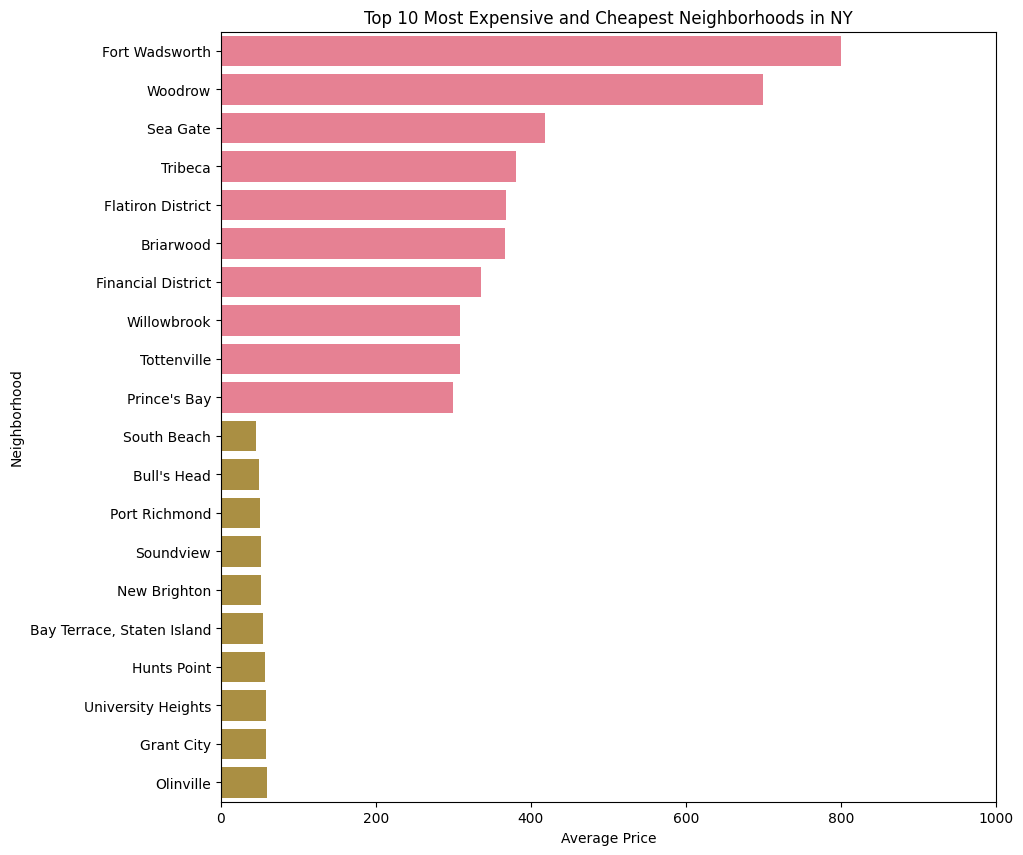

In [11]:
#do one with both the top 10 and bottom 10
plt.figure(figsize=(10, 10))
sns.set_palette("husl")
sns.barplot(x='price', y='neighbourhood', data=pivot_expensive)
sns.barplot(x='price', y='neighbourhood', data=pivot_cheapest)
plt.title('Top 10 Most Expensive and Cheapest Neighborhoods in NY')
plt.xlim(0, 1000)
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()


In [29]:
import folium

In [13]:
#lets peek at the column names of the original data.
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [25]:
print(df.head())

     id                                               name  host_id  \
0  2595                              Skylit Midtown Castle     2845   
1  3831  Whole flr w/private bdrm, bath & kitchen(pls r...     4869   
2  5121                                    BlissArtsSpace!     7356   
3  5136           Spacious Brooklyn Duplex, Patio + Garden     7378   
4  5178                   Large Furnished Room Near B'way　     8967   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0     Jennifer           Manhattan             Midtown  40.75362  -73.98377   
1  LisaRoxanne            Brooklyn        Clinton Hill  40.68514  -73.95976   
2        Garon            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
3      Rebecca            Brooklyn         Sunset Park  40.66120  -73.99423   
4     Shunichi           Manhattan      Hell's Kitchen  40.76489  -73.98493   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    

In [26]:
# Calculate the average price by neighborhood
df_avg = df.groupby('neighbourhood').agg({'price': 'mean'}).reset_index()
df_avg.columns = ['neighbourhood', 'average_price']

# View the resulting DataFrame
print(df_avg.head())


   neighbourhood  average_price
0       Allerton      92.813953
1  Arden Heights     119.200000
2       Arrochar     125.050000
3        Arverne     249.070423
4        Astoria      97.297483


In [28]:
# Create a dictionary to store coordinates for each neighborhood based on the original DataFrame
neighborhood_coordinates = df.groupby('neighbourhood')[['latitude', 'longitude']].mean().to_dict('index')

# Create a Folium map centered on an average location
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)  # Adjust center to NYC

# Normalize prices for color mapping (optional, but gives better color scale)
min_price = df_avg['average_price'].min()
max_price = df_avg['average_price'].max()

# Define a colormap
colormap = folium.LinearColormap(colors=['green', 'yellow', 'red'],
                                 vmin=min_price, vmax=max_price,
                                 caption='Average Price')

# Add markers for each neighborhood
for index, row in df_avg.iterrows():
    neighborhood = row['neighbourhood']
    price = row['average_price']
    coordinates = neighborhood_coordinates.get(neighborhood)

    # If the neighborhood has coordinates, add it to the map
    if coordinates:
        latitude = coordinates['latitude']
        longitude = coordinates['longitude']
        color = colormap(price)
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=10,
            popup=f"{neighborhood}: ${price:.2f}",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7
        ).add_to(m)

# Add the colormap legend to the map
colormap.add_to(m)

# Save the map to an HTML file
m.save('neighborhood_price_map.html')

m


In [32]:
m_full = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Normalize prices for color mapping
min_price = df['price'].min()
max_price = df['price'].max()

# Define a colormap
colormap = folium.LinearColormap(colors=['green', 'yellow', 'red'],
                                 vmin=min_price, vmax=max_price,
                                 caption='Price')

# Add a circle marker for each row in the dataframe
for index, row in df.iterrows():
    price = row['price']
    color = colormap(price)
    
    # Add a circle marker at each latitude, longitude
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,  # Size of the dot
        popup=f"{row['name']}: ${price}",
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(m_full)

# Add the colormap legend to the map
colormap.add_to(m_full)

# Save the map to an HTML file
m_full.save('price_map.html')

In [34]:
# Filter the DataFrame for each borough
boroughs = df['neighbourhood_group'].unique()

for borough in boroughs:
    # Filter the DataFrame for the current borough
    df_borough = df[df['neighbourhood_group'] == borough]
    
    # Calculate the average price for each neighborhood within the borough
    df_borough_avg = df_borough.groupby('neighbourhood').agg({'price': 'mean'}).reset_index()
    df_borough_avg.columns = ['neighbourhood', 'average_price']
    
    # Create a dictionary to store coordinates for each neighborhood based on the original DataFrame
    neighborhood_coordinates_borough = df_borough.groupby('neighbourhood')[['latitude', 'longitude']].mean().to_dict('index')
    
    # Create a Folium map centered on an average location of the borough
    avg_lat = df_borough['latitude'].mean()
    avg_lon = df_borough['longitude'].mean()
    m_borough = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)
    
    # Normalize prices for color mapping
    min_price_borough = df_borough_avg['average_price'].min()
    max_price_borough = df_borough_avg['average_price'].max()
    
    # Define a colormap
    colormap_borough = folium.LinearColormap(colors=['green', 'yellow', 'red'],
                                             vmin=min_price_borough, vmax=max_price_borough,
                                             caption='Average Price')
    
    # Add markers for each neighborhood
    for index, row in df_borough_avg.iterrows():
        neighborhood = row['neighbourhood']
        price = row['average_price']
        coordinates = neighborhood_coordinates_borough.get(neighborhood)
        
        # If the neighborhood has coordinates, add it to the map
        if coordinates:
            latitude = coordinates['latitude']
            longitude = coordinates['longitude']
            color = colormap_borough(price)
            folium.CircleMarker(
                location=[latitude, longitude],
                radius=10,
                popup=f"{neighborhood}: ${price:.2f}",
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.7
            ).add_to(m_borough)
    
    # Add the colormap legend to the map
    colormap_borough.add_to(m_borough)
    
    # Save the map to an HTML file
    m_borough.save(f'{borough}_price_map.html')

In [16]:
#  Now make all four widgets in a Tableau dashboard!
